In [1]:
!pip install numpy
!pip install pandas
!pip install tensorflow_cpu==2.18.0


In [2]:
import pandas as pd
import numpy as np
import keras


In [3]:
df = pd.read_csv('/content/spg.csv')

In [4]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [6]:
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


In [7]:
df.duplicated().sum()

np.int64(0)

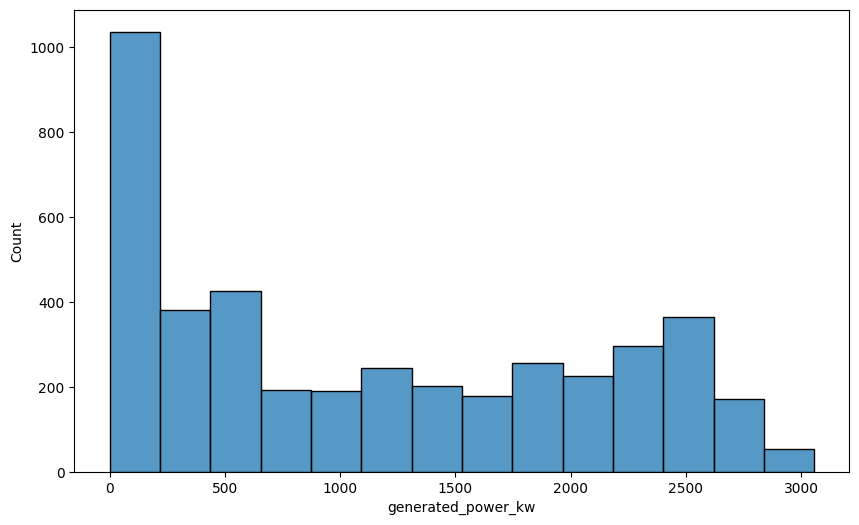

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

y = df['generated_power_kw']
X = df.drop('generated_power_kw', axis=1)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler  =  StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_val   =  scaler.transform(X_val)
X_test  =  scaler.transform(X_test)

n_cols = X_train.shape[1]


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [13]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping

# بناء الموديل
model = Sequential([
    Input(shape=(n_cols,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [14]:

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=64, verbose=1, callbacks=[early_stopping])


Epoch 1/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2142643.7500 - mean_absolute_error: 1124.8302 - val_loss: 2222052.5000 - val_mean_absolute_error: 1175.4011
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2031650.5000 - mean_absolute_error: 1078.5980 - val_loss: 2138299.7500 - val_mean_absolute_error: 1148.8601
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1987119.8750 - mean_absolute_error: 1078.5780 - val_loss: 1900892.7500 - val_mean_absolute_error: 1078.2627
Epoch 4/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1699468.6250 - mean_absolute_error: 982.2880 - val_loss: 1472637.8750 - val_mean_absolute_error: 944.9930
Epoch 5/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1278394.3750 - mean_absolute_error: 854.3217 - val_loss: 966389.4375 - val_mean_absolute_error: 766.3904
Epoch 6/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 802882.1875 - mean_absolute_error: 674.3887 - val_loss: 624871.4375 - val_mean_absolute_error: 607.8209
Ep

In [15]:
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [16]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_val   = r2_score(y_val, y_val_pred)

print("R²: Training:", r2_train)
print("R²: Validation:", r2_val)


R²: Training: 0.8477226716367672
R²: Validation: 0.7626800673269574


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)



27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE : 197627.5661855294
RMSE: 444.5532208695933
MAE : 301.82449689336863
R²  : 0.7836503500748377


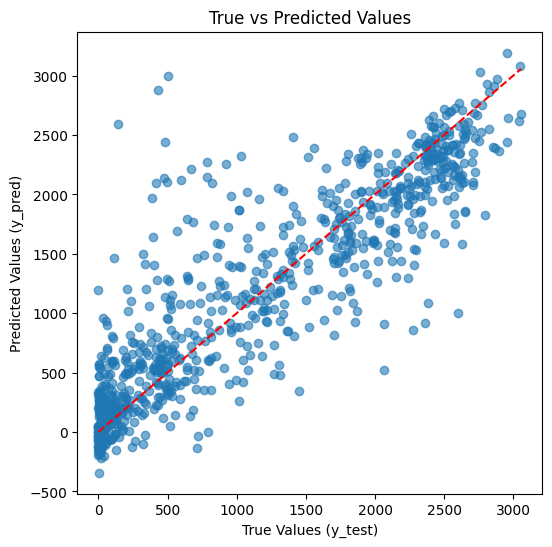

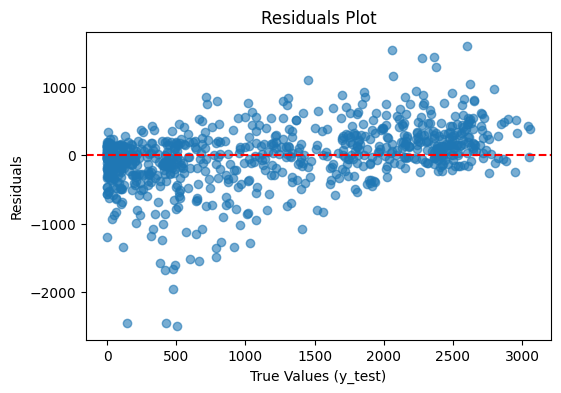

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True vs Predicted Values")
plt.show()

residuals = y_test - y_pred.flatten()
plt.figure(figsize=(6,4))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("True Values (y_test)")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()
